In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import scipy.io as sio
import h5py

In [46]:
import skimage

In [ ]:
skimage.

# Define functions for generating a synthetic noise

In [3]:
def add_noise(image, shot_noise=0.01, read_noise=0.0005):
    """Adds random shot (proportional to image) and read (independent) noise."""
    variance = image * shot_noise + read_noise
    sigma=np.sqrt(variance)
    noise=sigma *np.random.normal(0,1,(np.shape(image)[0],np.shape(image)[1]))

    out      = image + noise

    out=np.maximum(0.0,np.minimum(out,1.0))

    return out.astype(np.float32)

def random_noise_levels():
    """Generates random noise levels from a log-log linear distribution."""
    log_min_shot_noise = np.log(0.0001)
    log_max_shot_noise = np.log(0.012)
    log_shot_noise     = np.random.uniform(log_min_shot_noise, log_max_shot_noise)

    shot_noise = np.exp(log_shot_noise)

    line = lambda x: 2.18 * x + 1.20
    n= np.random.normal(0,0.26)
    log_read_noise = line(log_shot_noise) + n
    read_noise     = np.exp(log_read_noise)
    return shot_noise, read_noise

In [13]:
def make_normal_noise(image_shape):
    return np.random.normal(0,1,(image_shape[0],image_shape[1]))
def make_noise_with_sampled_normal_noise(image,normal_noise,shot_noise=0.01, read_noise=0.0005):
    """Adds random shot (proportional to image) and read (independent) noise."""
    variance = image * shot_noise + read_noise
    #print(variance[0,:10])
    sigma=np.sqrt(variance)
     
    noise=sigma * normal_noise
    return noise
def make_noisy_image(image, noise):
    out = image + noise

    out = np.maximum(0.0,np.minimum(out,1.0))

    return out.astype(np.float32)

# Set parameters for the noise

In [5]:
alpha = 0.01
beta = 0.02 ## beta == sigma in the paper
sigma = beta

In [6]:
!ls ../data/Fivek_dataset/Fivek_test_set.mat

../data/Fivek_dataset/Fivek_test_set.mat


# 1. Load the FiveK dataset

In [14]:
file_name='../data/Fivek_dataset/Fivek_test_set.mat'
te_data= sio.loadmat(file_name)
te_clean_array=te_data["clean_images"]
print(np.shape(te_clean_array))

(200, 512, 512)


In [15]:
# Make test images with multiple sampling from same distribution(parameter)

In [37]:
# create multiple synthetic datasetsd

alpha_beta = [[0.01,0.02],[0.05,0.02],[0.01,0.0002]]

num_images = 20
num_sampling = 20
noise_arr = []
print_plt = False

for alpha, beta in alpha_beta:
    sigma = beta
    #print(alpha,beta)
    # load original dataset
    file_name='../data/Fivek_dataset/Fivek_test_set.mat'
    te_data= sio.loadmat(file_name)
    te_clean_array=te_data["clean_images"][:num_images]
    te_clean_array = np.repeat(te_clean_array, num_sampling,axis=0)
    print(np.shape(te_clean_array))
    
    # add noise
    for j in range(num_sampling):
        noise_arr.append(make_normal_noise(te_clean_array[0].shape))
    
    te_noisy_array=np.zeros(te_clean_array.shape)
    for i in range(num_images):
        for j in range(num_sampling):
            index = i*num_sampling + j
            image = te_clean_array[index]
            # print(index,end=',')
            target_noise = make_noise_with_sampled_normal_noise(image,noise_arr[j],alpha,beta)
            te_noisy_array[index] = make_noisy_image(image,target_noise)
        # print("")
    print(te_noisy_array.shape,te_clean_array.shape)
    if print_plt is True:
        index = -1
        plt.subplot(121)
        plt.imshow(te_clean_array[index])
        plt.subplot(122)
        plt.imshow(te_noisy_array[index])
        plt.pause(0.01)
    f2 = h5py.File(f"./test_fivek_rawRGB_alpha_{alpha}_beta_{beta}_{num_sampling}sampling{num_images}images.hdf5", "w")
    f2.create_dataset("noisy_images", te_noisy_array.shape, dtype='f', data=te_noisy_array)
    f2.create_dataset("clean_images", te_clean_array.shape, dtype='f', data=te_clean_array)
    f2.close()  
    
    print(f"Create dataset alpha : {alpha} beta : {beta} completed")
    #sys.exit(-1)

(400, 512, 512)
(400, 512, 512) (400, 512, 512)
Create dataset alpha : 0.01 beta : 0.02 completed
(400, 512, 512)
(400, 512, 512) (400, 512, 512)
Create dataset alpha : 0.05 beta : 0.02 completed
(400, 512, 512)
(400, 512, 512) (400, 512, 512)
Create dataset alpha : 0.01 beta : 0.0002 completed


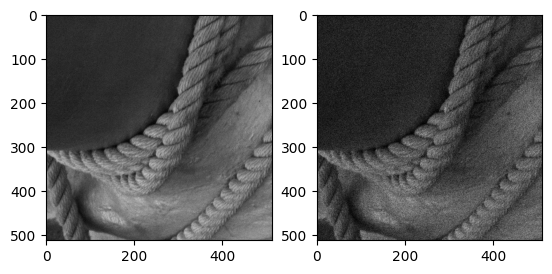

In [44]:
index = 40      
plt.subplot(121)
plt.imshow(te_clean_array[index],cmap='gray')
plt.subplot(122)
plt.imshow(te_noisy_array[index],cmap='gray')
plt.pause(0.01)

In [5]:
make_noise_with_sampled_normal_noise?

Signature:
make_noise_with_sampled_normal_noise(
    normal_noise,
    shot_noise=0.01,
    read_noise=0.0005,
)
Docstring: Adds random shot (proportional to image) and read (independent) noise.
File:      /tmp/ipykernel_119656/3508739471.py
Type:      function


In [8]:
# create multiple synthetic datasetsd

alpha_beta = [[0.01,0.02],[0.05,0.02],[0.01,0.0002]]

for alpha, beta in alpha_beta:
    sigma = beta
    #print(alpha,beta)
    # load original dataset
    file_name='../data/Fivek_train_set.hdf5'
    tr_data= h5py.File(file_name,"r")
    tr_clean_array=tr_data["clean_images"]
    print(np.shape(tr_clean_array))
    file_name='../data/Fivek_test_set.mat'
    te_data= sio.loadmat(file_name)
    te_clean_array=te_data["clean_images"]
    print(np.shape(te_clean_array))
    tr_noisy_array=np.zeros(tr_clean_array.shape)
    # add noise
    for i in range(0, tr_clean_array.shape[0]):
        tr_noisy_array[i] = add_noise(tr_clean_array[i], alpha, sigma**2)
        
    te_noisy_array=np.zeros(te_clean_array.shape)
    for i in range(0, te_clean_array.shape[0]):
        te_noisy_array[i] = add_noise(te_clean_array[i], alpha, sigma**2)
    f1 = h5py.File("./train_fivek_rawRGB_25000x256x256_cropped_alpha_"+str(alpha)+"_beta_"+str(beta)+".hdf5", "w")
    f1.create_dataset("noisy_images", tr_noisy_array.shape, dtype='f', data=tr_noisy_array)
    f1.create_dataset("clean_images", tr_clean_array.shape, dtype='f', data=tr_clean_array)
    f1.close()

    f2 = h5py.File("./test_fivek_rawRGB_alpha_"+str(alpha)+"_beta_"+str(beta)+".hdf5", "w")
    f2.create_dataset("noisy_images", te_noisy_array.shape, dtype='f', data=te_noisy_array)
    f2.create_dataset("clean_images", te_clean_array.shape, dtype='f', data=te_clean_array)
    f2.close()  
    print(f"Create dataset alpha : {alpha} beta : {beta} completed")

(25000, 256, 256)
(200, 512, 512)
Create dataset alpha : 0.01 beta : 0.02 completed
(25000, 256, 256)
(200, 512, 512)
Create dataset alpha : 0.05 beta : 0.02 completed
(25000, 256, 256)
(200, 512, 512)
Create dataset alpha : 0.01 beta : 0.0002 completed


# 2. Generate synthtic datasets

In [ ]:
tr_noisy_array=np.zeros(tr_clean_array.shape)
for i in range(0, tr_clean_array.shape[0]):
    tr_noisy_array[i] = add_noise(tr_clean_array[i], alpha, sigma**2)
    
te_noisy_array=np.zeros(te_clean_array.shape)
for i in range(0, te_clean_array.shape[0]):
    te_noisy_array[i] = add_noise(te_clean_array[i], alpha, sigma**2)

# 3. Save datasets

In [ ]:
f1 = h5py.File("./train_fivek_rawRGB_25000x256x256_cropped_alpha_"+str(alpha)+"_beta_"+str(beta)+".hdf5", "w")
f1.create_dataset("noisy_images", tr_noisy_array.shape, dtype='f', data=tr_noisy_array)
f1.create_dataset("clean_images", tr_clean_array.shape, dtype='f', data=tr_clean_array)
f1.close()

f2 = h5py.File("./test_fivek_rawRGB_alpha_"+str(alpha)+"_beta_"+str(beta)+".hdf5", "w")
f2.create_dataset("noisy_images", te_noisy_array.shape, dtype='f', data=te_noisy_array)
f2.create_dataset("clean_images", te_clean_array.shape, dtype='f', data=te_clean_array)
f2.close()

0.0 0.99993896 (512, 512)


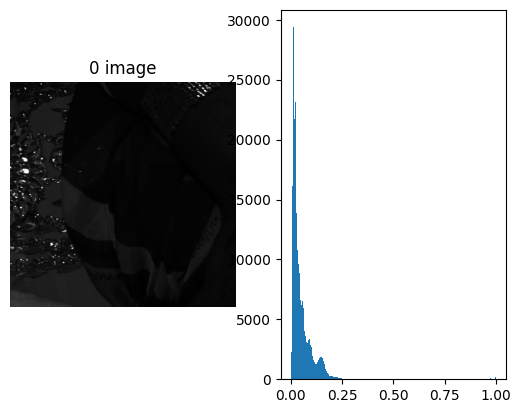

0.0647583 0.27404785 (512, 512)


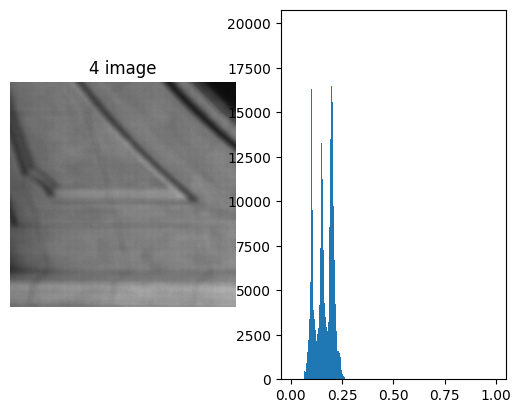

0.0048828125 0.2783203 (512, 512)


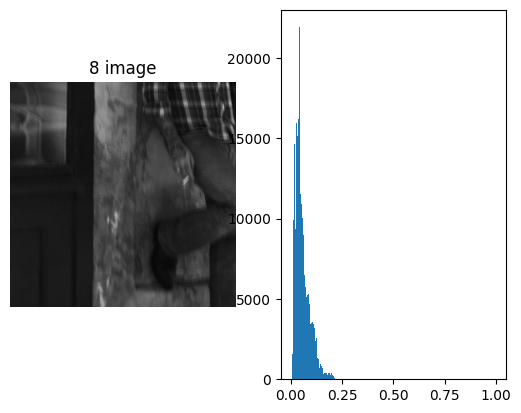

0.050720215 0.15020752 (512, 512)


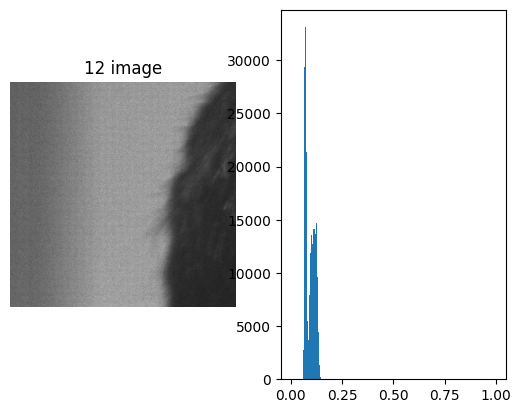

0.08203125 0.19042969 (512, 512)


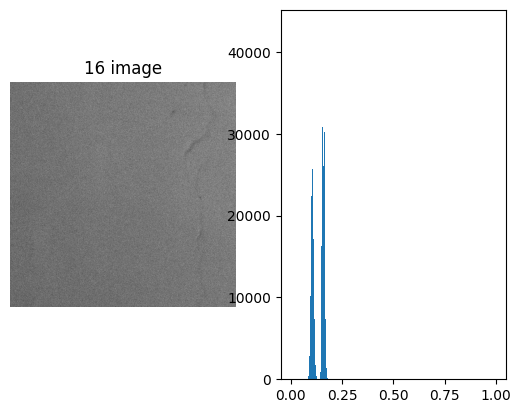

0.032226562 0.99975586 (512, 512)


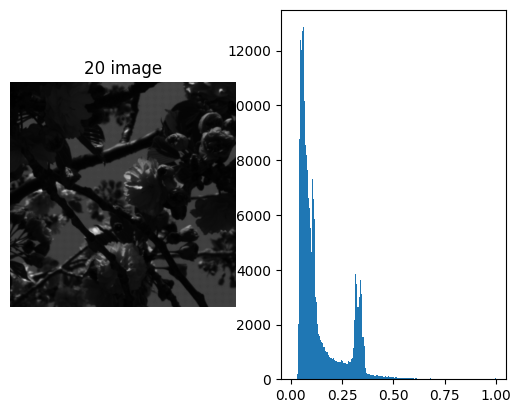

0.0 0.36523438 (512, 512)


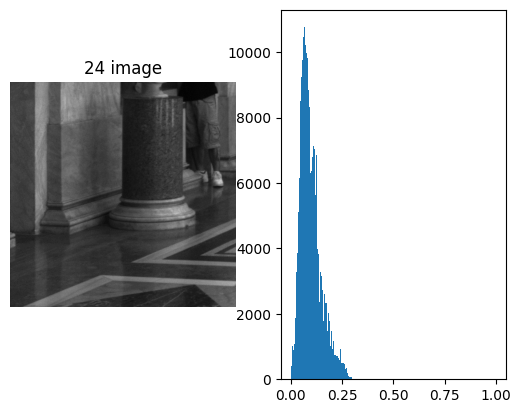

0.013305664 0.99993896 (512, 512)


KeyboardInterrupt: 

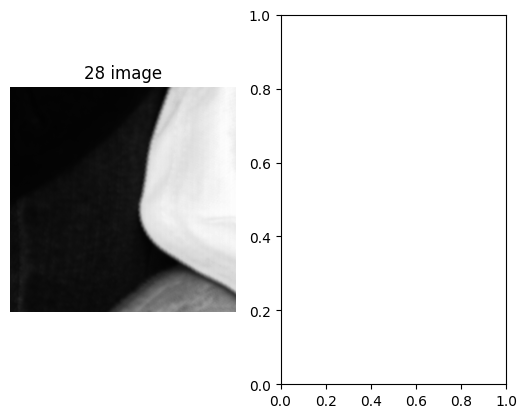

In [6]:
import PIL
import matplotlib.pyplot as plt
i = 0
bins = np.linspace(0,1,256)
while i < te_clean_array.shape[0]:
    img = te_clean_array[i]
    print(img.min(),img.max(),img.shape)
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title(f'{i} image')
    plt.imshow(img,cmap='gray')
    plt.subplot(1,2,2)
    plt.hist(img.flatten(),bins)
    plt.pause(0.1)
    i += 4
